<a href="https://colab.research.google.com/github/hyeonjun/AlphaZero/blob/master/3_1_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST는 0~9의 숫자를 손으로 쓴 이미지와 정답 라벨을 묶은 데이터 셋
훈련 데이터 6만건, 테스트 데이터 1만건 포함
이미지는 그레이 스케일, 28*28 픽셀 사이즈

In [ ]:
# Import Packages
# %matplotlib inline :Google Colab 상에 그래프를 표시하는 명령어
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import  Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 



1.   train_images : 훈련 데이터 배열
2.   train_labels : 훈련 라벨 배열

1.   test_images : 테스트 이미지 배열
2.   test_labels : 테스트 라벨 배열









In [ ]:
# 데이터 세트 준비
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 데이터 세트 형태 확인
ndarray의 shape로 배열의 차원수를 얻을 수 있음.
(60000, 28, 28)은 60000 * 28 * 28 의 3차원 배열.
(60000,) 은 60000이라는 1차원 배열

In [ ]:
# 데이터 세트 형태 확인
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# 데이터 세트 이미지 확인
가장 처음 10건의 훈련 이미지 확인
1.   subplot(nrows, ncols, index) : 서브 플롯 추가. 인수(행/열 수와 플롯 위치)
2.   imshow(X, cmap=None) : 이미지 표시. 인수(이미지와 컬러 맵)



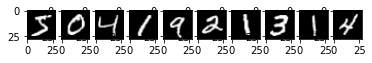

In [ ]:
 # 데이터 세트 이미지 확인
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(train_images[i], 'gray')
plt.show()

In [ ]:
# 데이터 세트 라벨 확인 : 가장 앞 10건의 후련 라벨을 확인
print(train_labels[0:10])

[5 0 4 1 9 2 1 3 1 4]


# 데이터 세트 전처리 및 확인
학습 전에 데이터 세트를 뉴럴 네트워크에 적합한 형태로 전환해야 함 => 전처리

# 데이터 세트 이미지 전처리
훈련 데이터 이미지와 테스트 이미지의 배열 엘리먼트인 이미지를 2차원 배열(28*28)에서 1차원 배열(784)로 변환한다. 이후의 뉴럴 네트워크는 1차원 배열 엘리먼트를 입력받기 때문이다.

ndarray의 차원 수를 변환하려면 reshape()를 사용한다.

In [ ]:
# 데이터 세트 이미지 전처리
train_images = train_iamges.reshape((train_iamges.shape[0], 784))
test_images = test_images.reshape((test_images.shape[0], 784))

# 데이터 세트 이미지 전처리 후 차원 확인
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


# 데이터 세트 라벨 전처리
훈련 라벨과 테스트 라벨의 배열 엘리먼트 라벨은 원-핫 인코딩으로 변환한다.

원-핫 인코딩이란 어떤 엘리먼트의 값만이 1이고, 그 외 엘리먼트의 값은 0인 표현 방법

숫자 원-핫 인코딩
0  :  1,0,0,0,0,0,0,0,0,0

1  :  0,1,0,0,0,0,0,0,0,0

2  :  0,0,1,0,0,0,0,0,0,0

3  :  0,0,0,1,0,0,0,0,0,0

4  :  0,0,0,0,1,0,0,0,0,0


숫자를 원-핫 인코딩으로 변환하려면 to_categorical()을 사용한다.




In [ ]:
# 데이터 세트 라벨 전처리
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 데이터 세트 라벨 전처리 후 형태 확인
print(train_labels.shape)
print(test_labels.shape)

(60000, 10)
(10000, 10)


# 모델 생성
# 모델의 네트워크 구조
전결합 레이어 3개를 쌓은 간단한 모델을 만든다.

'전결합 레이어'는 각 유닛이 다음 레이어의 모든 유닛과 결합된 레이어.



1. 전결합 레이어 (유닛*256, 시그모이드 함수)
2. 전결합 레이어 (유닛*128, 시그모이드 함수)
3. Dropout
4. 전결합 레이어 (유닛*10, 소프트맥스 함수)

# 입력 레이어와 출력 레이어
3겹으로 쌓은 전결합 레이어 중 최초의 전결합 레이어가 '입력 레이어', 가장 마지막의 전결합 레이어가 '출력 레이어'다.

입력 레이어의 형태는 입력 데이터의 형태(여기서는 784=28*28), 출력 레이어 유닛 수는 출력 크기(여기서는 10)를 지정한다.

# 히든 레이어
'히든 레이어'의 레이어와 유닛 수는 자유롭게 결정해서 생성할 수 있다.
일반적으로 레이어와 유닛의 수를 늘릴수록 복잡한 특징을 잡아낼 수 있지만, 레이어 수가 많은수록 학습에 시간이 걸린다. 또한, 유닛의 수가 많아질수록 중요성이 낮은 특징을 추출해 과적합이 되기 쉽다.

과적합이란 훈련 데이터에만 최적화되어 훈련 과정에서 접하지 않았던 데이터에 대한 정확도(정밀도)가 낮아지는 현상

뉴럴 네트워크의 동작 이론과 완전히 동떨어진 모델을 구현하기는 어려우므로, 모델 네트워크 구조는 유사한 다른 모델을 참고해 생성하는 경우가 많다.

# 드롭아웃
드롭아웃(Dropout)이란 과적합을 방지해 모델의 정밀도를 높이기 위한 방법의 하나다. 임의의 레이어의 유닛을 랜덤으로 무효화해서 특정 뉴런의 존재에 대한 의존을 막고 범용성을 높인다. 유닛을 무효화하는 비율은 일반적으로 50% 정도이면 좋은 것으로 알려져 있다. 주로 전결합 레이어 다음에 추가한다.

# 활성화 함수
활성화 함수(Activation Function)는 주로 전결합 레이어 다음에 적용하는 함수.레이어의 출력을 특정한 함수에 통과시킨 뒤, 최종 출력합을 결정한다.

활성화 함수를 사용하면 선형적으로 분류할 수 없는 데이터도 분류할 수 있기 때문에 보다 복잡한 특징을 잡아낼 수 있다. 선형적으로 분류할 수 없는 데이터란 일직선으로 분리할 수 없는 데이터를 의미한다.

입력 레이어와 히든 레이어의 활성화 함수는 주로 시그모이드 함수이며, 출력 레이어의 활성화 함수는 소프트맥스 함수를 사용한다.


# 활성화 함수 종류
1. sigmoid(시그모이드 함수)
  
  출력은 반드시 0~1에 수렵하므로 극단적인 출력값이 적다.
2. tanh(tanh 함수)
  
  출력은 반드시 -1~1에 수렵하므로 극단적인 출력값이 적다.
3. relu(ReLU 함수)

  출력은 0~무한대이므로 극단적인 출력값이 발생한다.
4. linear(항등 함수)

  입력된 값을 그대로 출력한다.
5. softmax(소프트맥스 함수)

  분류의 출력 레이어로 이용한다.





# 모델 생성
Sequential을 생성, add()로 레이어와 Dropout을 추가한다.

1. Dense : 전결합 레이어. 인수는 유닛 수와 활성화 함수 및 입력 데이터 형태
2. Dropout : 드롭아웃. 인수는 유닛을 무효로 만드는 확률

In [ ]:
# 모델 생성
model = Sequential()
# 입력 레이어
model.add(Dense(256, activation='sigmoid', input_shape=(784,)))
# 히든 레이어
model.add(Dense(128, activation='sigmoid'))
# 드롭 아웃
model.add(Dropout(rate=0.5))
# 출력 레이어
model.add(Dense(10, activation='softmax'))

# 컴파일
뉴럴 네트워크 모델을 컴파일한다. 컴파일 시 '손실 함수', '최적화 함수', '평가 함수'의 3가지를 설정한다.

# 손실 함수
손실 함수(Loss Function)는 모델의 예측값과 정답 데이터 사이의 오차를 계산하는 함수(계산식)다. 이 오차에 기반해 최적화 함수에서 손실 함수의 결과가 0에 가까워지도록 가중치 파라미터와 바이어스를 최적화한다.

1. binary_crossentropy(이진 클래스 교차, 엔트로피 오차)

 이진 클래스 분류에 특화되어 있어 주로 이진 클래스 분류에 사용됨
2. categoricla_crossentropy(다중 클래스 교차, 엔트로피 오차)

 다중 클래스 분류의 평가에 우수한 특정을 가지고 있어 주로 다중 클래스 분류에 사용됨
3. mse(평균 제곱 오차)

 연속값의 평가에 우수한 특성을 가지고 있어 주로 회귀에 사용됨


# 최적화 함수
최적화 함수(Optimizer)는 손실 함수의 결과가 0에 가까워지도록 가중치 파라미터와 바이어스를 최적화하는 함수(계산식)다. 미분으로 구한 값을 학습률, 이폭(epoch) 수, 과거의 가중치 갱신량 등을 고려해서 얼마나 가중치를 반영해 갱신할지 결정한다.
1 이폭은 1회 시행을 의미하며, 훈련 데이터를 한 차례 전부 사용하려면 1 이폭으로 계산한다.

1. SGD : 가장 전통적인 최적화 함수
2. Adam : 전반적으로 우수한 특성을 가지고 있어 널리 사용되는 최적화 함수

# 평가 지표
'평가 지표'는 모델의 성능을 측정하기 위해 사용되는 지표다. 측정 결과는 학습을 수행하는 fit()의 반환값으로 저장되고 클래스 등에서 표시한다.

1. acc(Accuracy) : 정답률. 1에 가까울수록 좋다. 분류에서 이용한다.
2. mae(Mean Absolute Error) : 평균 절대 오차. 0에 가까울수록 좋다. 회귀에서 이용한다.

# 컴파일
여기서는 손실함수는 분류인 'categorial_crossentropy', 최적화 함수는 'SGD', 평가 지표는 'acc'를 지정한다.

SGD의 인수 'lr'은 학습률(learning rate)을 의미한다. 학습률이란 각 레이어의 가중치를 일정하게 얼마만큼 변결할지 결정하는 값이다. 학습률이 너무 낮으면 학습이 잘 진행되지 않으며, 너무 크면 최적화를 뛰어넘어 값이 발산해 버리기도 한다.

In [ ]:
# 컴파일
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1), metrics=['acc'])

# 학습
훈련 이미지와 훈련 라벨의 배열을 모델에 전달해 학습을 수행한다. model.fit()을 사용해 학습 시작.

model

fit(x=None, y=None, batch_size=None, epochs=1, validation_split=0.0)

설명: 학습 진행

인수 : 
 x(ndarray 타입) 훈련 데이터

 y(ndarray 타입) 훈련 라벨

 batch_size(int 타입) 배치 사이즈. 
  
 : 훈련 데이터의 엘리먼트를 몇개 단위로 훈련시킬지 결정한다.클수록 학습 속도가 빠르나, 메모리 소비량도 증가한다.
      
epochs(int 타입) 훈련할 이폭 수. 훈련 데이터를 1회 전부 사용하면 1 이폭으로 간주

validation_split(float 타입)

: 훈련 데이터 중 검증 데이터로 사용할 데이터의 비율. 훈련 데이터의 일부분을 분리해 훈련에 이용하지 않고 검증 데이터로 이용한다.

반환값 : History(이력)




In [ ]:
# 학습
history = model.fit(train_images, train_labels, batch_size=500, epochs=5, validation_split=0.2)

Epoch 1/5
96/96 [==============================] - 2s 18ms/step - loss: 2.0766 - acc: 0.2900 - val_loss: 1.0006 - val_acc: 0.8366
Epoch 2/5
96/96 [==============================] - 2s 16ms/step - loss: 1.0469 - acc: 0.6996 - val_loss: 0.5948 - val_acc: 0.8813
Epoch 3/5
96/96 [==============================] - 2s 16ms/step - loss: 0.7247 - acc: 0.7979 - val_loss: 0.4434 - val_acc: 0.8979
Epoch 4/5
96/96 [==============================] - 2s 16ms/step - loss: 0.5717 - acc: 0.8438 - val_loss: 0.3705 - val_acc: 0.9059
Epoch 5/5
96/96 [==============================] - 2s 16ms/step - loss: 0.4902 - acc: 0.8647 - val_loss: 0.3298 - val_acc: 0.9124


1. loss : 훈련 데이터의 오차. 0에 가까울수록 좋음
2. acc : 훈련 데이터의 정답률. 1에 가까울수록 좋음
3. val_loss : 검증 데이터의 오차. 0에 가까울수록 좋음
4. val_acc : 검증 데이터의 정답률. 1에 가까울수록 좋음

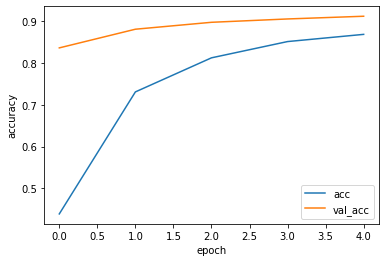

In [ ]:
# 그래프 표시
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

# 평가
테스트 이미지와 테스트 라벨의 배열을 모델에 전달해 평가를 실행하고, 정답률을 확인한다. 평가를 수행하려면 model.evaluate()를 사용한다.

model

evaluate(x=None, y=None, batch_size=None)

설명 : 평가 실행

인수

 - x(ndarray 타입) 테스트 데이터

 - y(ndarray 타입) 테스트 라벨

 - batch_size(int 타입) 배치사이즈

반환값 : list(평가 결과)

In [ ]:
# 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('loss: {:.4f}\nacc: {:.4f}'.format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.3343 - acc: 0.9113
loss: 0.3343
acc: 0.9113


# 추론
마지막으로 첫 데이터 10건의 테스트 이미지 추론을 수행해 예측 결과를 얻는다. 추론을 수행하려면 model.predict()를 사용한다.

model

predict(x=None)

설명 : 추론 실행

인수 : x(ndarray 타입) 입력 데이터

반환값 : ndarray 예측 결과

반환값은 이미지별로 '원-핫 인코딩 형식'으로 반환한다. 이를 np.argmax()를 사용해 최댓값의 인덱스로 변환한다.

np

argmax(v, axis=None)

설명 : 최댓값의 인덱스로 변환

인수

 - v(ndarray 타입) 배열
 - axis(int 타입) 최댓값을 읽을 축의 방향

반환값 : ndarray 또는 int | 반환 후의 배열 또는 수치


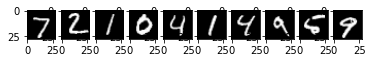

[7 2 1 0 4 1 4 9 6 9]


In [ ]:
# 추론할 이미지 표시
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(test_images[i].reshape((28,28)), 'gray')
plt.show()

# 추론한 라벨 표시
test_predictions = model.predict(test_images[0:10])
test_predictions = np.argmax(test_predictions, axis=1)
print(test_predictions)

a3b2c6a1
